In [1]:
import optax
import jax

import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import random
from dataclasses import asdict

from src.gaussian_measures import GaussianProcess
from src.kernels.base_kernels import GaussianKernel, ARDKernel

jax.config.update("jax_enable_x64", True)

# Generate Random Data

In [2]:
seed = 42
np.random.seed(seed)
key = random.PRNGKey(seed)

n = 200
sigma_true = 0.5

x = jnp.linspace(-2, 2, n, dtype=np.float32).reshape(-1, 1)

key, subkey = random.split(key)
y = (
    (2 * jnp.sin(x * (2 * jnp.pi)) + sigma_true * random.normal(subkey, shape=x.shape))
).reshape(-1)

# Gaussian Process

In [3]:
kernel = ARDKernel()
kernel_parameters = kernel.Parameters(
    log_sigma=jnp.log(2.0), log_alpha=jnp.log(jnp.ones(x.shape[1]))
)

gaussian_process = GaussianProcess(kernel, x, y)
gaussian_process_parameters = GaussianProcess.Parameters(
    log_sigma=jnp.log(1.0), kernel=kernel_parameters
)
gaussian_process_parameters.sigma

DeviceArray(1., dtype=float64, weak_type=True)

## Visualisation pre-hyperpaarameter optimisation

/var/folders/dz/t1w83lh147s6fj634rdmhlgm0000gn/T/ipykernel_28201/3148874814.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  np.random.multivariate_normal(mean_plot, covariance_plot, size=1).reshape(-1),


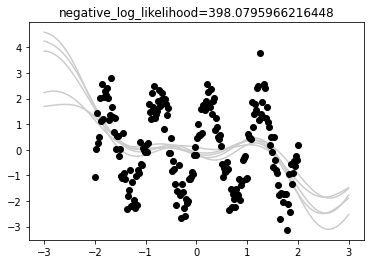

In [4]:
negative_log_likelihood = float(
    gaussian_process.posterior_negative_log_likelihood(
        **asdict(gaussian_process_parameters)
    )
)
x_plot = jnp.linspace(jnp.min(x) - 1, jnp.max(x) + 1, 100).reshape(-1, 1)
mean_plot, covariance_plot = gaussian_process.posterior_distribution(
    x_plot, **asdict(gaussian_process_parameters)
)
for _ in range(5):
    plt.plot(
        x_plot,
        np.random.multivariate_normal(mean_plot, covariance_plot, size=1).reshape(-1),
        color=(0.8, 0.8, 0.8),
        zorder=-1,
    )
plt.title(f"{negative_log_likelihood=}")
plt.scatter(x, y, color="k", zorder=1)
plt.show()

## Hyperparameter Optimisation

In [5]:
learning_rate = 1e-1
optimizer = optax.adam(learning_rate)
number_of_iterations = 100
gaussian_process_parameters = gaussian_process.train(
    optimizer, number_of_iterations, **asdict(gaussian_process_parameters)
)
gaussian_process_parameters.sigma

DeviceArray(0.52467653, dtype=float64)

## Visualisation post-hyperpaarameter optimisation

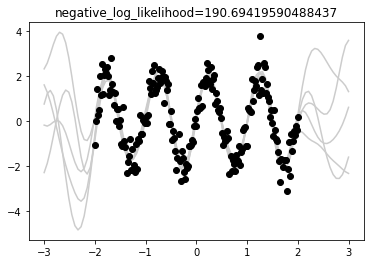

In [6]:
negative_log_likelihood = float(
    gaussian_process.posterior_negative_log_likelihood(
        **asdict(gaussian_process_parameters)
    )
)
x_plot = jnp.linspace(jnp.min(x) - 1, jnp.max(x) + 1, 100).reshape(-1, 1)
mean_plot, covariance_plot = gaussian_process.posterior_distribution(
    x_plot, **asdict(gaussian_process_parameters)
)
for _ in range(5):
    plt.plot(
        x_plot,
        np.random.multivariate_normal(mean_plot, covariance_plot, size=1).reshape(-1),
        color=(0.8, 0.8, 0.8),
        zorder=-1,
    )
plt.title(f"{negative_log_likelihood=}")
plt.scatter(x, y, color="k", zorder=1)
plt.show()